[깃허브 주소](https://github.com/ADPclass/ADP_book_ver01/tree/main/%EC%B5%9C%EC%8B%A0%20%EA%B8%B0%EC%B6%9C%EB%8F%99%ED%98%95%20%EB%AA%A8%EC%9D%98%EA%B3%A0%EC%82%AC)

## 머신러닝
### 1. 데이터 탐색 
#### (1) 시각화 포함 탐색적 자료분석을 시행하시오(EDA).
#### (2) 이상치를 식별하고 처리하시오.
#### (3) 앞선 두 단계에서 발견한 향후 분석 시에 고려해야 할 사항을 작성하시오.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/diabetes_for_test.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### (1) 시각화 포함 탐색적 자료분석을 시행하시오(EDA).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,36.980469,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,61.404453,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,999.000000,1.000000


In [34]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,36.934000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


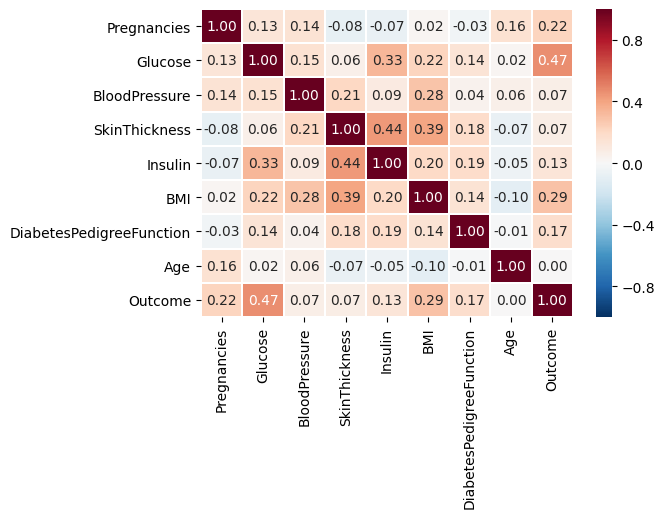

In [14]:
df_corr = df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(df_corr, annot=True, fmt='.2f', vmax=1, vmin=-1, cmap='RdBu_r', linewidth=.3)
plt.show()

[해석]
- Outcome과 Glucose 간에 약한 양의 상관성이 존재함(0.47).
- SkinThickness와 Inslin 간에 약한 상의 상관성이 존재함(0.44).
- BMI와 SkinThickness 간에 약한 상의 상관성이 존재함(0.39).
- Outcome을 제외한 변수들 간에 0.9 이상의 상관성은 없으므로 모든 변수를 모델링해도 될 것임.

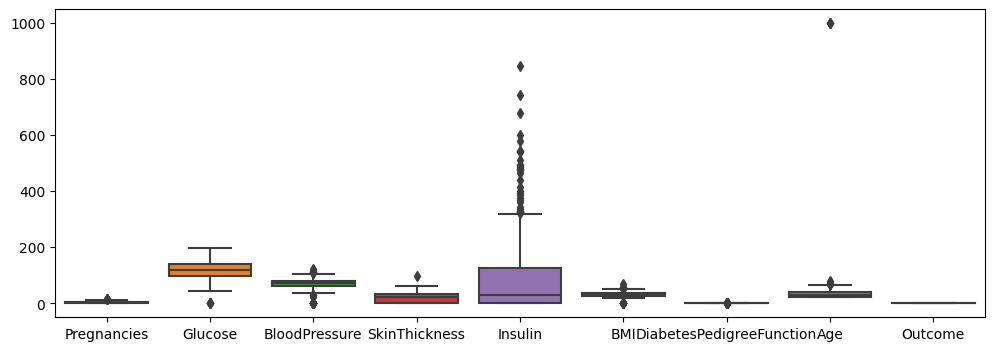

In [18]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df)
plt.show()

[해석]
- 상자 그림을 시각화한 결과, Age에서 가장 멀리 떨어진 이상치가 존재하기에 이상치 처리가 필요하다고 판단함.
- Insulin 에서도 이상치가 많이 발견되었지만 실제로 이상치를 가진 사람이 있을 수 있기에 현업의 의견이 필요할 것으로 판단되어 Age의 이상치만 처리함.